In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-dataset/PNB_5Y.csv
/kaggle/input/bank-dataset/UNIONBANK_5Y.csv
/kaggle/input/bank-dataset/BOI_5Y.csv
/kaggle/input/bank-dataset/SBIN_5Y.csv


In [2]:
df = pd.read_csv("../input/bank-dataset/PNB_5Y.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-06,76.449997,77.800003,76.050003,77.000000,77.000000,5897442.0
1,2016-06-07,77.500000,78.650002,76.300003,77.650002,77.650002,10613718.0
2,2016-06-08,77.750000,81.400002,77.400002,80.699997,80.699997,17047951.0
3,2016-06-09,81.199997,84.400002,80.949997,82.300003,82.300003,22320765.0
4,2016-06-10,82.300003,84.949997,81.949997,84.199997,84.199997,18694884.0


In [3]:
close = df["Close"]
close.shape

(1234,)

In [4]:
close


0       77.000000
1       77.650002
2       80.699997
3       82.300003
4       84.199997
          ...    
1229    42.400002
1230    41.650002
1231    44.000000
1232    43.700001
1233    43.099998
Name: Close, Length: 1234, dtype: float64

In [5]:
close = close.dropna()
close.shape

(1232,)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
tmp = scaler.fit(np.array(close).reshape(-1,1))
new_df = scaler.transform(np.array(close).reshape(-1,1))

 
print(new_df)

[[0.26951871]
 [0.27299465]
 [0.28930479]
 ...
 [0.09304813]
 [0.09144385]
 [0.08823528]]


In [7]:
training_size=int(len(new_df)*0.67)
test_size=len(new_df)-training_size
train_data,test_data=new_df[0:training_size,:],new_df[training_size:len(new_df),:1]

print(train_data.shape)
print(test_data.shape)

(825, 1)
(407, 1)


In [8]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [9]:
time_step=100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
#print(X_train, Y_train)

(724, 100) (724,) (306, 100) (306,)


In [10]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape, X_test.shape)
#print(X_train, Y_train)

(724, 100, 1) (306, 100, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
____________________________________________________

In [12]:
model.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 286ms/step - loss: 0.1181 - val_loss: 0.0105
Epoch 2/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0143 - val_loss: 0.0177
Epoch 3/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0105 - val_loss: 0.0052
Epoch 4/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0056 - val_loss: 0.0020
Epoch 5/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0039 - val_loss: 6.0137e-04
Epoch 6/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0051 - val_loss: 7.3637e-04
Epoch 7/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0042 - val_loss: 7.8327e-04
Epoch 8/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0043 - val_loss: 8.0587e-04
Epoch 9/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0044 - val_loss: 6.1030e-04
Epoch 10/100
12/12 [==============================] - 2s 178ms/step - l

In [13]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
print(train_predict.shape, test_predict.shape)

(724, 1) (306, 1)


In [14]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(test_predict)

[[43.904163]
 [43.200005]
 [42.355175]
 [41.1847  ]
 [39.973938]
 [38.82382 ]
 [37.79115 ]
 [36.997173]
 [36.4938  ]
 [36.29834 ]
 [36.214584]
 [36.189865]
 [36.089916]
 [35.841618]
 [35.471638]
 [35.012363]
 [34.49338 ]
 [33.872814]
 [33.153103]
 [32.41722 ]
 [31.759912]
 [31.272997]
 [30.971209]
 [30.816545]
 [30.762949]
 [30.806566]
 [30.970932]
 [31.140335]
 [31.256542]
 [31.3091  ]
 [31.257113]
 [31.138254]
 [31.013224]
 [30.962383]
 [30.999025]
 [30.996744]
 [30.868748]
 [30.628633]
 [30.339926]
 [30.029716]
 [29.709494]
 [29.397625]
 [29.204924]
 [29.094746]
 [29.01225 ]
 [28.866356]
 [28.610853]
 [28.270012]
 [27.911272]
 [27.56756 ]
 [27.266663]
 [27.060604]
 [26.923555]
 [26.83434 ]
 [26.89059 ]
 [27.097994]
 [27.456553]
 [27.947363]
 [28.638264]
 [29.41648 ]
 [30.130917]
 [30.801832]
 [31.359474]
 [31.78392 ]
 [32.1069  ]
 [32.320984]
 [32.436455]
 [32.512424]
 [32.60646 ]
 [32.795757]
 [33.16013 ]
 [33.616016]
 [34.11341 ]
 [34.56983 ]
 [34.873047]
 [34.972652]
 [34.984673]

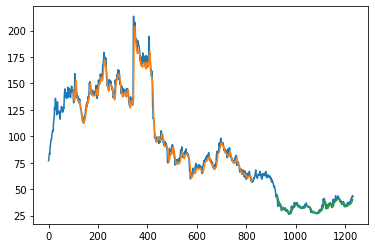

In [15]:
X = scaler.fit_transform(np.array(close).reshape(-1,1))
import matplotlib.pyplot as plt

look_back=100
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(X)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()